## Homework \#3: Stochastic Processes in Biology

Student: Youssaf Menacer


In [354]:
# Import packages needed.
import numpy as np
import random
from scipy.special import gamma, factorial
import matplotlib.pyplot as plt
import seaborn as sns
import collections
import tqdm
from numba import jit
from numba import njit, prange
import time
from scipy.integrate import solve_ivp

## Problem #1

Simulate an integrate and fire neuron with Poisson input without threshold to verify that after sufficient time the membrane potential follows the distribution given by 

Eq. (8.46): 
$$
p(u,\infty) = \frac{1}{\sigma \sqrt{\pi}} \textrm{exp}\bigg( \frac{(u-RI_0)^2}{\sigma^2} \bigg)
$$

In [355]:
# Poisson spike train generation.
def inhomo_PoissonSpikeTrain(dt,T,rx,Total_time):
    rand_unis = np.random.uniform(0,1,(1,len(Total_time)))
    num_spikes = 0
    spikes_x = np.zeros_like(Total_time)
    spike_time_x = np.zeros((int(T*10**9)))
    for i in range(len(Total_time)):
        prob = rx[i] * dt # rx is time-dependent rate.
        if (prob > rand_unis[0,i]):
            spike_time_x[num_spikes] = Total_time[i]
            spikes_x[i] = 1
            num_spikes += 1
        else:
            spikes_x[i] = 0
    spike_time_x = spike_time_x[0:num_spikes]
    return spike_time_x, spikes_x

In [356]:
def EulerMethod_poisson_input_nothreshold(spike_time_x,spikes_x,u_rest,dt,tau_m,R,w,T,Total_time,u_ic):
    u = np.zeros_like(Total_time)
    u_saved = np.zeros_like(Total_time)
    u[0] = u_ic
    u_saved[0] = u_ic 
    
    for i in range(len(Total_time)-1): 

        # Euler update to u - mem pot
        u[i+1] = u[i] + (dt/tau_m)*(-u[i] + w * R * spikes_x[i] )

    return u

In [357]:
# Total_time  for sim
T = 10000 / 10**3 # secs 
# Total_time discretization
dt = 0.01 / 10**3 # sec
# Number of Total_time bins
Total_time=np.arange(dt,T+dt,dt)

# Neuron parameters
u_rest = 0 / 10**3 # Volts
tau_m = 10 / 10**3 # sec
tau_v = 100 / 10**3 # sec
R = 500 * 10**6 # Ohms

Num_synapses = 10**2
w = 10**3 *5 / 10**12 # Amps

# Inhomogeneous rate for Poisson spike trains
rx = Num_synapses *5* ( np.ones_like((Total_time)) ) # Hz

np.random.seed(2)

u_ic = 0 /1000

spike_time_x, spikes_x = inhomo_PoissonSpikeTrain(dt,T,rx,Total_time)

u = EulerMethod_poisson_input_nothreshold(spike_time_x,spikes_x,
                                          u_rest,dt,tau_m,R,w,T,Total_time,u_ic)

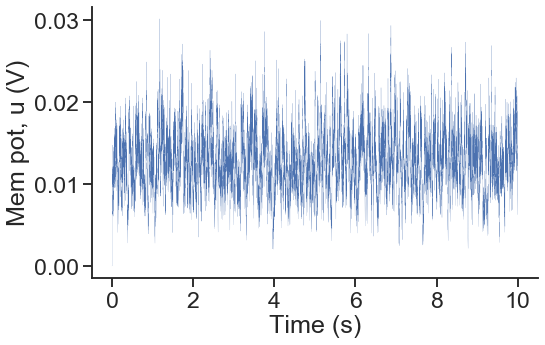

In [358]:
# Create figure and plot 
## Plot results
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":.15})

plt.plot(Total_time ,u)

plt.xlabel('Time (s)')
plt.ylabel('Mem pot, u (V)')

sns.despine()
plt.show()

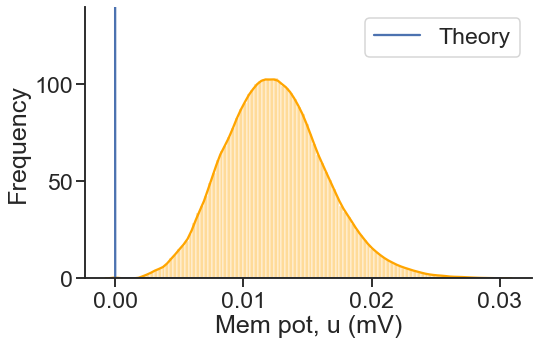

In [359]:
# Create figure and plot 
## Plot results
fig=plt.figure(figsize=(8,5))
ax = plt.subplot(111)

sns.set()
sns.set_style('whitegrid')
sns.set_style('white')
sns.set_style("ticks")
sns.set_context("talk", font_scale=1.4, rc={"lines.linewidth":2.3})


# Sims
sns.distplot(u,hist=True, bins=100, color='orange')

# Theory
rx = Num_synapses * 5 # Each cell fires at 5 Hz
sigma = np.sqrt( tau_m * rx * w**2 ); RI_0 = tau_m * rx * w;
u_theory = np.linspace(0,30,10000) /1000
u_dist = 1/sigma * 1/np.sqrt(np.pi) * np.exp( -(u_theory-RI_0)**2 / (sigma**2))

u_dist = u_dist[:-1] / np.sum(u_dist[:-1]*np.diff(u_theory))
plt.plot(u_theory[:-1],u_dist, label = 'Theory')

plt.ylabel('Frequency')
plt.xlabel('Mem pot, u (mV)')

plt.ylim((0,140))

plt.legend()

sns.despine()
plt.show()